# 題目
請以Apriori演算法，
以附檔為DATA、
支持度=0.4、信賴度=0.8，
找出強關聯規則並列出，列出型式仿照上課PPT即可。

須包含item、condfidence、support、lift等資訊

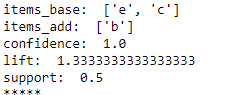

## import所需套件

In [1]:
from apyori import apriori

## 資料前處理

- 為了產生符合apriori函式所需的測資格式

```python
data = [
    ['a', 'c', 'd'], 
    ['b', 'c', 'e'],
    ['a', 'b', 'c', 'e'], 
    ['b', 'e']
]
```

In [2]:
import csv

#讀取csv檔案
file = open('./Apriori-set.csv')
reader = csv.reader(file)


#將資料類型轉為list
#此時是一個list內含許多String，且包含id，但id可由index得知，故可省略
data_initial = list(reader)  #list
file.close()

#開始轉換為一個list內含許多小lists，每個小list又包含許多char
#移除csv第一行的id項
c=0
data = []
for r in data_initial:
    if c!=0:
        data.append(list(r[1]))  ##list data內放入csv第2行的items項
        c=c+1
#        if c==6: #FIXME:
#            break 
    if c==0:  ##避免放入csv第1列的標題
        c=c+1 
    
#此時生成的data，已經經過資料前處理成可以放入apriori函式的規格了

印出csv的有效資料的欄數

In [3]:
len(data)

1000

此時生成的data，已經經過資料前處理成可以放入apriori函式的規格了

## apriori分析data，找出強關聯規則

使用apriori函式去分析data的關聯規則，
並將最小支持度設為0.4，
最小信賴度設為80%。
接著再把得到的結果轉型為list型別。

In [4]:
association_rules = apriori(data, min_support=0.4, min_confidence=0.8)
association_results = list(association_rules)

In [7]:
association_results

[RelationRecord(items=frozenset({'O', 'S'}), support=0.459, ordered_statistics=[OrderedStatistic(items_base=frozenset({'S'}), items_add=frozenset({'O'}), confidence=0.8109540636042404, lift=1.3744984128885431)]),
 RelationRecord(items=frozenset({'Y', 'O'}), support=0.467, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Y'}), items_add=frozenset({'O'}), confidence=0.8065630397236616, lift=1.3670559995316298)]),
 RelationRecord(items=frozenset({'Y', 'S'}), support=0.461, ordered_statistics=[OrderedStatistic(items_base=frozenset({'S'}), items_add=frozenset({'Y'}), confidence=0.814487632508834, lift=1.4067143912069673)]),
 RelationRecord(items=frozenset({'Y', 'O', 'S'}), support=0.421, ordered_statistics=[OrderedStatistic(items_base=frozenset({'O', 'S'}), items_add=frozenset({'Y'}), confidence=0.9172113289760347, lift=1.5841301018584366), OrderedStatistic(items_base=frozenset({'Y', 'O'}), items_add=frozenset({'S'}), confidence=0.9014989293361884, lift=1.5927542921134072), Order

## 印出結果--強關聯規則

把得到的association_result利用Python的語法轉換成想要Print的形式

In [6]:
for item in association_results:
    li_item = list(item)
    for i in li_item[2] :
        a = list(i) 
        print('items_base: ', list((a[0]))) 
        print('items_add: ', list((a[1]))) 
        print('confidence: ', a[2])
        print('lift: ', a[3]) 
    print("support: ", li_item[1]) 
    print("*****")

items_base:  ['S']
items_add:  ['O']
confidence:  0.8109540636042404
lift:  1.3744984128885431
support:  0.459
*****
items_base:  ['Y']
items_add:  ['O']
confidence:  0.8065630397236616
lift:  1.3670559995316298
support:  0.467
*****
items_base:  ['S']
items_add:  ['Y']
confidence:  0.814487632508834
lift:  1.4067143912069673
support:  0.461
*****
items_base:  ['O', 'S']
items_add:  ['Y']
confidence:  0.9172113289760347
lift:  1.5841301018584366
items_base:  ['Y', 'O']
items_add:  ['S']
confidence:  0.9014989293361884
lift:  1.5927542921134072
items_base:  ['Y', 'S']
items_add:  ['O']
confidence:  0.9132321041214749
lift:  1.5478510239347034
support:  0.421
*****
